# Chem 18: Introductory Data Science for Future Chemists

> Instructor: [Yuki Oyama](mailto:y.oyama@lrcs.ac), [Prprnya](mailto:nya@prpr.zip)
>
> The Christian F. Weichman Department of Chemistry, Lastoria Royal College of Science

This material is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0</a><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

Welcome to Chem 18: Introductory Data Science for Future Chemists!

In this course, you will learn how to use modern computational tools – particularly the Python programming language – to process, analyze, and display data. As chemists, data is at the heart of your work: it supports your hypotheses, validates your findings, and helps you communicate your results effectively. Being able to process and visualize data clearly is an essential skill for the future of chemical research.

This course is designed as a self-paced, interactive tutorial. You will work through these Jupyter Notebooks on your own, learning by doing. Many of the concepts will feel familiar, and you'll discover that data processing is not as difficult as it may first seem. Our goal is to make the learning process efficient for both you and us, while giving you practical skills you can apply immediately in your studies and research.

A note on grading: this course is offered on a Pass/Fail basis. Your focus should be on exploring, experimenting, and building confidence with the tools – not on chasing points.

Take your time, enjoy the process, and let's begin the journey into data-driven chemistry!

## Example 1: A Five-Minute Reaction in Solution

Suppose you are running a reaction below:

$$\ce{t-BuBr + H2O -> t-BuOH + HBr}.$$

This is a simple solvolysis reaction, which generates $\ce{HBr}$ as one of the products. We all know that the rate-determining step is the first step, which is the generation of carbocation:

$$\ce{t-BuBr <=> t-Bu+ + Br-}.$$

(We are just to simplify this reaction, so we suppose that no backward reaction happens.) This is a first-order reaction with respect to the reactant, $\ce{t-BuBr}$. The rate law is

$$\frac{d[\ce{t-BuOH}]}{dt} = \frac{d[\ce{HBr}]}{dt} = -\frac{d[\ce{t-BuBr}]}{dt} = k [\ce{t-BuBr}].$$

Integrating the expression above, we obtain

$$\ln[\ce{t-BuOH}] = -kt + \ln[\ce{t-BuOH}]_0.$$

Now we have a set of data, and we want to plot this data and find $k$. It's definitely easy to do by hand, or you can use software like Excel to do this fit. However, we want to introduce you a much more powerful tool, which is this interactive notebook. Run the code below by copying them into the next cell and press <kbd>Shift</kbd> + <kbd>Enter</kbd> (or <kbd>Shift</kbd> + <kbd>Return</kbd> on Mac) to execute. See what's happened?

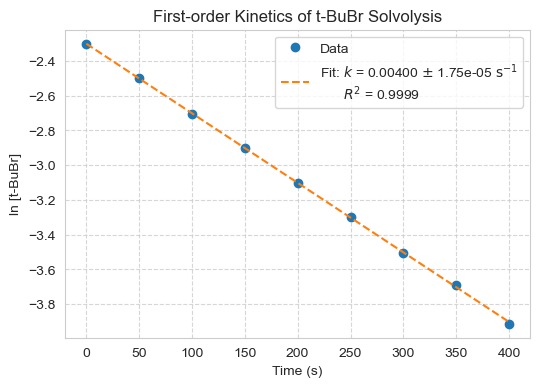

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
data = np.loadtxt('./assets/reaction_data.csv', delimiter=',', skiprows=1)
time = data[:,0]
conc = data[:,1]

# Take ln of concentrations
ln_conc = np.log(conc)

# Linear fit with covariance
coeffs, cov = np.polyfit(time, ln_conc, 1, cov=True)
slope, intercept = coeffs
k = -slope

# Standard deviations from diagonal of covariance
slope_std, intercept_std = np.sqrt(np.diag(cov))

# Plot data + fit
plt.figure(figsize=(6,4))
plt.plot(time, ln_conc, label='Data', linestyle='', marker='o')
plt.plot(time, slope*time + intercept, linestyle='--',
         label=(rf'''Fit: $k$ = {k:.5f} $\pm$ {slope_std:.2e} $\mathrm{{s}}^{{-1}}$
      $R^2$ = {r2_score(ln_conc, slope*time + intercept):.4f}'''))
plt.xlabel('Time (s)')
plt.ylabel('ln [t-BuBr]')
plt.grid(linestyle='--', alpha=0.8)
plt.legend()
plt.title('First-order Kinetics of t-BuBr Solvolysis')
plt.show()

This is a very simple example, but it shows how powerful this tool is. You can use it to explore your data, find the best fit, and evaluate the quality of your fit.

We can even use less code to plot the same data, by using another library called Seaborn.

<Axes: >

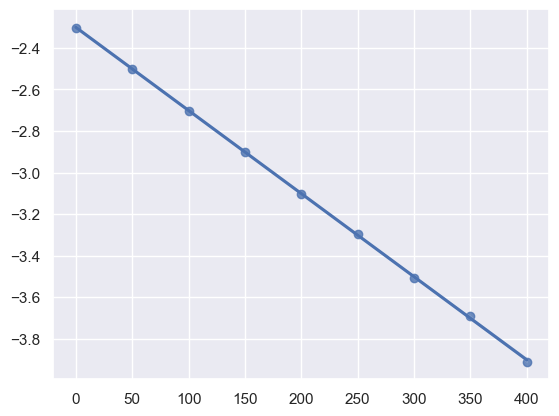

In [2]:
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.regplot(x=time, y=ln_conc)

## Example 2: Particle in a 2D Box

In quantum mechanics, the [particle in a box](http://en.wikipedia.org/wiki/Particle_in_a_box) (PIB) model is a common model for illustrating quantum mechanical concepts. Mathematically, it is given by

$$\Psi(x, y, t) = \sin \left( \frac{n_x \pi x}{L_x} \right) \sin \left(\frac{n_y \pi y}{L_y} \right) \cos \left(\frac{E_{n_x,n_y} t}{h} \right)$$

However, it is not easy to think about a "2D wave," so we usually choose to visualize it and make it animate. The script `2d_pib.py` generates an interactive 2D PIB model. We will use the following code to implement it. You can play with the parameters and see how the wave changes.

```python
import pib2d
```

In [4]:
import pib2d
pib2d.show_plot()
# not completed - code has some problems
# also need to animate

interactive(children=(IntSlider(value=1, description='nx', max=10, min=1), IntSlider(value=1, description='ny'…

<function pib2d.make_plot(nx=1, ny=1, t: float = 0)>

## Course Syllabus

This course is organized into several modules, each focusing on different aspects of data processing and analysis using Python. Here's a brief overview of what you can expect:
- **Basics of Python Programming**: Learn the fundamentals of Python, including data types, variables, operators, control structures, functions, and modules.
- **Data Visualization**: Explore libraries like Matplotlib and Seaborn to create informative and visually appealing plots.
- **Scientific Calculation on Python**: Dive into numerical computing with NumPy and SciPy, covering array manipulations, mathematical functions, and statistical analysis.
- **Symbolic Mathematics**: Understand how to perform algebraic manipulations, calculus, and equation solving symbolically.
- **Signal Processing**: Learn common signal processing techniques, including filtering, Fourier transforms, etc.
- **Optimization**: Learn how to optimize functions and models using optimization algorithms beyond basic methods and evaluate their performance.
- **Quantum Chemistry**: Learn how to perform quantum chemistry calculations using PySCF and Psi4 libraries.
- **Machine Learning**: Learn basic machine learning models and their applications in chemistry.
- **Chemoinformatics**: Understand fundamental concepts of chemoinformatics and integrate previous tools to perform cheminformatics analysis in the areas like drug design, reaction discovery, etc.
- **Advanced Topics**: Depending on the pace of the class, we may explore additional topics such as web scraping, database management, software engineering, large language model in chemistry, etc.